In [1]:
import tensorflow_datasets as tfds
dataset = tfds.load('laion400m/images', split='train', data_dir='gs://us-central2-storage/tensorflow_datasets', batch_size=1,shuffle_files=True)

/mnt/vlm-pd/miniconda3/envs/llvm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-29 04:03:24.062253: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-29 04:03:25.742701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 04:03:25.742778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 04:03:25.961695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugi

In [2]:
dataset

<_PrefetchDataset element_spec={'caption': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), 'license': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'nsfw': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'original_height': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'original_width': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'similarity': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'url': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

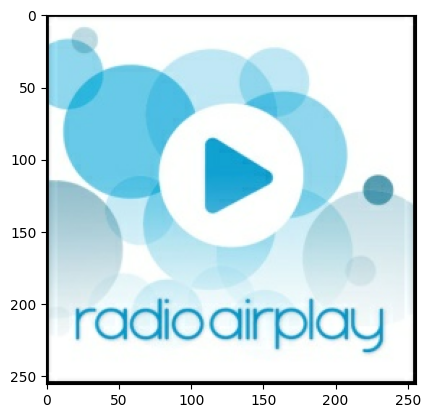

[b'Radio Airplay']


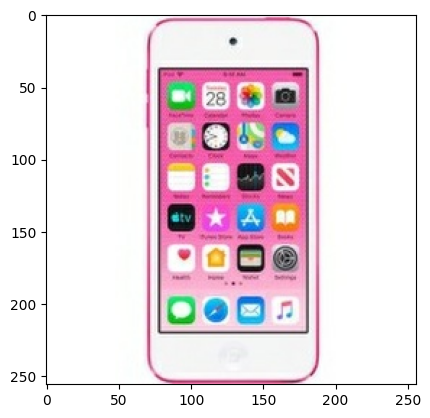

[b'Apple  ipod touch 128gb pink']


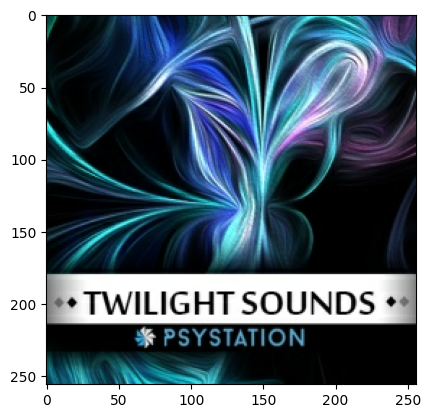

[b'psystation-twilight-sounds']


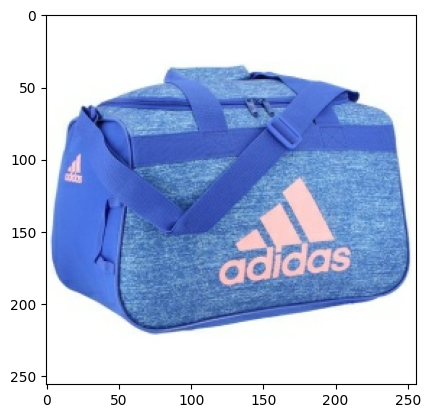

[b'adidas Diablo Small Duffel Bag']


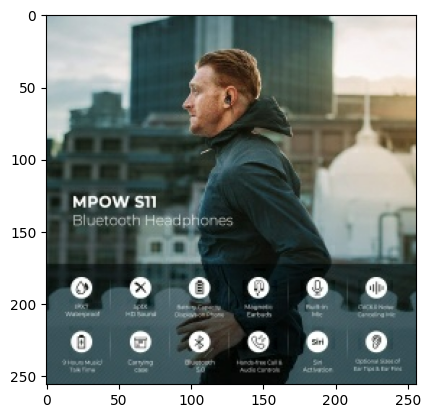

[b'Mpow S11 Sport Wireless Auricolari']


In [3]:
import matplotlib.pyplot as plt
for i in range(5):
    batch = next(iter(dataset))
    img = batch['image']
    plt.imshow(img[0])
    plt.show()
    print(batch['caption'].numpy())

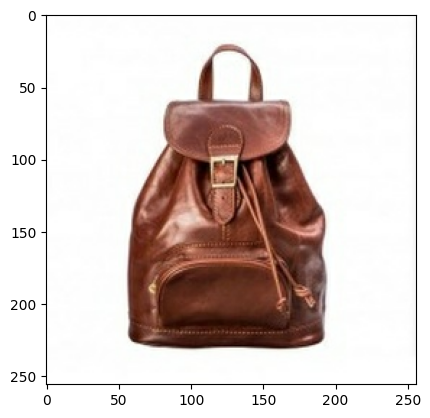

[b'Free ebooks download uk Let Go Now: Embrace Detachment as a Path to Freedom by Karen Casey']


In [12]:
for batch in dataset:
    img = batch['image']
    plt.imshow(img[0])
    plt.show()
    print(batch['caption'].numpy())
    break

In [13]:
metadata_path = "gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets/downloads/manual/00000.parquet"

In [14]:
import pandas as pd
metadata = pd.read_parquet(metadata_path)

In [17]:
metadata[:5]

,NSFW,similarity,LICENSE,caption,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,UNLIKELY,0.304913,?,one bedroom apartments in san diego san diego ...,http://tse2.mm.bing.net/th?id=OIP.4NnZIvhZvhLc...,000000022,success,None,256.0,256.0,474.0,355.0,"{""Image ExifOffset"": ""26"", ""EXIF Tag 0x4000"": ...",d3238c4e1733dcf438509a10c125ad02
1,UNLIKELY,0.320233,?,Beautiful happy smiling woman in kitchen inter...,http://static6.depositphotos.com/1000292/539/i...,000000019,success,None,256.0,256.0,169.0,112.0,{},ec0a12ac2cc582c2f93224a68ca07cc4
2,UNLIKELY,0.372754,,The Bluesbreakers Greeting Cards - Clapton Liv...,http://images.fineartamerica.com/images-greeti...,000000010,success,None,256.0,256.0,175.0,125.0,{},a9969f77ea20aafb8280d8675250589d
3,UNLIKELY,0.349141,?,4x8 galvanized corrugated steel sheet,http://sc01.alicdn.com/kf/HTB1E7fDKFXXXXbwXXXX...,000000021,success,None,256.0,256.0,200.0,200.0,{},13678cfed96c7fbf93bcf31006ea1719
4,UNSURE,0.340796,?,[A Must Read] 6 African Music Legends You Shou...,https://superxclusive.com/wp-content/uploads/2...,000000013,failed_to_download,<urlopen error [Errno 111] Connection refused>,NaN,NaN,NaN,NaN,None,None


In [34]:
# given file path, return the corresponding caption
import pathlib as epath
file_name = "000000022.jpg"
file_path = epath.Path(file_name)
name = file_path.stem

row = metadata[metadata['key']==name]
# get the series
row = row.squeeze()
type(row)

pandas.core.series.Series

In [35]:
type(metadata.iloc[0])

pandas.core.series.Series